In [164]:
from IPython.display import HTML

In [165]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Identify Fraud From Enron Email
### Project Overview

#### Goal
Using machine learning skills to build an algorithm to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

In [4]:
import sys
import pickle
import pprint
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tester
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import warnings
warnings.filterwarnings('ignore')

In [5]:
%matplotlib inline

In [6]:
#Load the disctionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

#### Overview of the dataset

In [7]:
def exploration_data(data_dict):
    total_people = len(data_dict)
    print "total number of people in the dataset: ", total_people
    
    number_features = len(data_dict["ALLEN PHILLIP K"])
    total_features = data_dict["ALLEN PHILLIP K"].keys()
    print "Total features in the dataset: "
    print total_features
    print "poi is the label, the number of all other featuers in the dataset is: ", number_features-1
    print "An example entry 'ALLEN PHILLIP K' in the dataset: "
    print data_dict["ALLEN PHILLIP K"]
    
    #check for the poi
    total_poi = 0
    for k in data_dict:
        if data_dict[k]["poi"] == True:
            total_poi+=1
    print "The number of poi:", total_poi
    print "The percentage of poi is {:0.2f}%.".format(100.00*total_poi/total_people)
    
exploration_data(data_dict)

total number of people in the dataset:  146
Total features in the dataset: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
poi is the label, the number of all other featuers in the dataset is:  20
An example entry 'ALLEN PHILLIP K' in the dataset: 
{'salary': 201955, 'to_messages': 2902, 'deferral_payments': 2869717, 'total_payments': 4484442, 'exercised_stock_options': 1729541, 'bonus': 4175000, 'restricted_stock': 126027, 'shared_receipt_with_poi': 1407, 'restricted_stock_deferred': -126027, 'total_stock_value': 1729541, 'expenses': 13868, 'loan_advances': 'NaN', 'from_messages': 2195, 'other': 152, 'from_this_person_to_poi': 65, 'poi': False, 'di

#### Outliers
After visualizating the "Salary" and "Bonus", one huge number popped out. Checked the keys of the dataset, I found one key "Total" with big number of "salary" and "bonus", is the sum of all other person.This is an outlier.

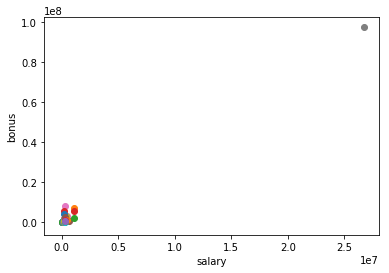

In [12]:
#check for outliers in dataset and remove these outliers

def plot_data(data_dict,f1,f2):
    features = [f1,f2]
    data = featureFormat(data_dict,features)
    
    #data visulization
    for point in data:
        arr1 = point[0]
        arr2 = point[1]
        plt.scatter(arr1,arr2)
    
    plt.xlabel(f1)
    plt.ylabel(f2)
    
    plt.show()
       
plot_data(data_dict,"salary","bonus")

**Remove this outlier "Total"**

In [14]:
#Check the keys and the outlier could be the total key
#Total is the sum of all salary and bonus
#pop will change the dictonary
data_dict.pop("TOTAL",0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

**Plot the dataset after outlier removal, although there are four other big numbers in the plot, there is no extreme plot left.**

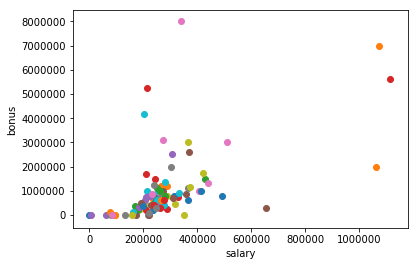

In [15]:
#check the dataset after outlier removal
plot_data(data_dict,"salary","bonus")

**Explore keys further to check if there are other unapproporate data points in dataset **

In [16]:
#explore other keys
keys = []
for k in data_dict:
    keys.append(k)

pprint.pprint(sorted(keys))


['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

**Easily find "THE TRAVEL AGENCY IN THE PARK" is not a name  
Remove this confusing key**

In [17]:
#remove outlier
data_dict.pop('THE TRAVEL AGENCY IN THE PARK',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

#### Check the dataset after outliers removal

In [18]:
#check the dataset after outliers removal
exploration_data(data_dict)

total number of people in the dataset:  144
Total features in the dataset: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']
poi is the label, the number of all other featuers in the dataset is:  20
An example entry 'ALLEN PHILLIP K' in the dataset: 
{'salary': 201955, 'to_messages': 2902, 'deferral_payments': 2869717, 'total_payments': 4484442, 'exercised_stock_options': 1729541, 'bonus': 4175000, 'restricted_stock': 126027, 'shared_receipt_with_poi': 1407, 'restricted_stock_deferred': -126027, 'total_stock_value': 1729541, 'expenses': 13868, 'loan_advances': 'NaN', 'from_messages': 2195, 'other': 152, 'from_this_person_to_poi': 65, 'poi': False, 'di

#### Among these features, "email_address" is the feature related to people's name, so I excluded it from dataset.
#### The email communication from/to POI should be the important features, so I created two new features "from_poi_to_this_person_ratio" and "from_this_person_to_poi_ratio"
**In which:  
from_poi_to_this_person_ratio = from_poi_to_this_person/to_message  
from_this_person_to_poi_ratio = from_this_person_to_poi/from_message** 

In [19]:
#feature engineering
#remove feature "email_address"
#create new features "from_poi_to_this_person_ratio" and "from_this_person_to_poi_ratio"
for f in data_dict:
    if data_dict[f]["from_poi_to_this_person"]!="NaN":
        data_dict[f]["from_poi_to_this_person_ratio"] = 1.0 * data_dict[f]["from_poi_to_this_person"]/data_dict[f]["to_messages"]
    else:
        data_dict[f]["from_poi_to_this_person_ratio"] = "NaN"
        
for f in data_dict:
    if data_dict[f]["from_this_person_to_poi"]!="NaN":
        data_dict[f]["from_this_person_to_poi_ratio"] = 1.0 * data_dict[f]["from_this_person_to_poi"]/data_dict[f]["from_messages"]
    else:
        data_dict[f]["from_this_person_to_poi_ratio"] = "NaN"   
        

In [20]:
#make the featurs_list
features_list  = ['poi','total_payments','total_stock_value',
                  'salary', 'deferral_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
                  'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 
                  'director_fees','to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 
                  'shared_receipt_with_poi','from_poi_to_this_person_ratio','from_this_person_to_poi_ratio']

#### To explore the dataset, I transformed the dictionary into a dataframe

In [22]:
###df
df = pd.DataFrame.from_dict(data_dict,orient="index")
df = df.replace("NaN",np.nan)
df = df[features_list]
print "This dataset has {} rows and {} columns".format(df.shape[0],df.shape[1])
df.head()

This dataset has 144 rows and 22 columns


,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,NaN,4175000.0,-126027.0,-3081055.0,13868.0,...,304805.0,126027.0,NaN,2902.0,47.0,2195.0,65.0,1407.0,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,NaN,178980.0,NaN,NaN,NaN,NaN,3486.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,NaN,NaN,NaN,-560222.0,-5104.0,56301.0,...,NaN,1757552.0,NaN,566.0,39.0,29.0,0.0,465.0,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,NaN,1200000.0,NaN,-1386055.0,11200.0,...,1586055.0,3942714.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,NaN,400000.0,-82782.0,-201641.0,129142.0,...,NaN,145796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checked the null value among the dataset  
Caculated the total null values within each feature**

In [123]:
#impute missing values
df.isnull().sum()

poi                                0
total_payments                    21
total_stock_value                 19
salary                            50
deferral_payments                106
loan_advances                    141
bonus                             63
restricted_stock_deferred        127
deferred_income                   96
expenses                          50
exercised_stock_options           43
other                             53
long_term_incentive               79
restricted_stock                  35
director_fees                    128
to_messages                       58
from_poi_to_this_person           58
from_messages                     58
from_this_person_to_poi           58
shared_receipt_with_poi           58
from_poi_to_this_person_ratio     58
from_this_person_to_poi_ratio     58
dtype: int64

**Fillfulled these null values within financial features by 0  
Fillfulled these null values within contact features by the mean **

In [25]:
#impute null financial features by 0
df.loc[:,"total_payments":"director_fees"] = df.loc[:,"total_payments":"director_fees"].fillna(0)

#impute null contact features by the mean
df.loc[:,"to_messages":"from_this_person_to_poi_ratio"] = df.loc[:,"to_messages":"from_this_person_to_poi_ratio"].apply(lambda x: x.fillna(x.mean()),axis = 0)

#df.loc[:,"to_messages":"from_this_person_to_poi_ratio"] = df.loc[:,"to_messages":"from_this_person_to_poi_ratio"].fillna(0)

**Check the dataset again after null imputation **

In [26]:
#Check to see all null values are corrected
df.isnull().sum()

poi                              0
total_payments                   0
total_stock_value                0
salary                           0
deferral_payments                0
loan_advances                    0
bonus                            0
restricted_stock_deferred        0
deferred_income                  0
expenses                         0
exercised_stock_options          0
other                            0
long_term_incentive              0
restricted_stock                 0
director_fees                    0
to_messages                      0
from_poi_to_this_person          0
from_messages                    0
from_this_person_to_poi          0
shared_receipt_with_poi          0
from_poi_to_this_person_ratio    0
from_this_person_to_poi_ratio    0
dtype: int64

**Check the first 5 rows of the dataset**

In [27]:
df.head()

,poi,total_payments,total_stock_value,salary,deferral_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,expenses,...,long_term_incentive,restricted_stock,director_fees,to_messages,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi,from_poi_to_this_person_ratio,from_this_person_to_poi_ratio
ALLEN PHILLIP K,False,4484442.0,1729541.0,201955.0,2869717.0,0.0,4175000.0,-126027.0,-3081055.0,13868.0,...,304805.0,126027.0,0.0,2902.000000,47.000000,2195.000000,65.000000,1407.000000,0.016196,0.029613
BADUM JAMES P,False,182466.0,257817.0,0.0,178980.0,0.0,0.0,0.0,0.0,3486.0,...,0.0,0.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BANNANTINE JAMES M,False,916197.0,5243487.0,477.0,0.0,0.0,0.0,-560222.0,-5104.0,56301.0,...,0.0,1757552.0,0.0,566.000000,39.000000,29.000000,0.000000,465.000000,0.068905,0.000000
BAXTER JOHN C,False,5634343.0,10623258.0,267102.0,1295738.0,0.0,1200000.0,0.0,-1386055.0,11200.0,...,1586055.0,3942714.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055
BAY FRANKLIN R,False,827696.0,63014.0,239671.0,260455.0,0.0,400000.0,-82782.0,-201641.0,129142.0,...,0.0,145796.0,0.0,2073.860465,64.895349,608.790698,41.232558,1176.465116,0.037963,0.184055


In [28]:
#Store to my_dataset for easy export below
my_dataset = df.to_dict(orient = "index")
print "There are {} people in this dataset".format(len(my_dataset))

There are 144 people in this dataset


In [59]:
#extract features and labels from dataset for testing
data = featureFormat(my_dataset,features_list,sort_keys=True)

In [30]:
labels,features = targetFeatureSplit(data)

In [60]:
data.shape

(144L, 22L)

**Select features using random forest**

In [31]:
#select features using random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
tester.test_classifier(clf, my_dataset,features_list)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
	Accuracy: 0.86220	Precision: 0.44351	Recall: 0.13150	F1: 0.20285	F2: 0.15303
	Total predictions: 15000	True positives:  263	False positives:  330	False negatives: 1737	True negatives: 12670



**List the feature importance**

In [35]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

features_list_new = sorted(zip(map(lambda x:round(x,4), clf.feature_importances_),features_list[1:]),reverse = True)

In [36]:
features_df = pd.DataFrame(features_list_new)
features_df = features_df.rename(index = str, columns = {0:"importance",1:"feature"})

In [37]:
features_df

,importance,feature
0,0.1484,total_stock_value
1,0.1357,exercised_stock_options
2,0.1335,other
3,0.1013,from_this_person_to_poi_ratio
4,0.0843,bonus
5,0.0669,expenses
6,0.0514,total_payments
7,0.0441,from_this_person_to_poi
8,0.0427,from_poi_to_this_person_ratio
9,0.0420,salary


**Selected final features based on importance   
In which  
I selected "exercised_stock_options","exercised_stock_options","other" and "from_this_person_to_poi_ratio"**

In [120]:
selected_feaures = ['poi',"total_stock_value","exercised_stock_options","other","from_this_person_to_poi_ratio"]

In [114]:
#Try a variaty of classifiers
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [121]:
#gaussian navie bays
nb = GaussianNB()
tester.test_classifier(nb, my_dataset,selected_feaures)

GaussianNB(priors=None)
	Accuracy: 0.85413	Precision: 0.41149	Recall: 0.21850	F1: 0.28543	F2: 0.24112
	Total predictions: 15000	True positives:  437	False positives:  625	False negatives: 1563	True negatives: 12375



GaussianNB(priors=None)
	Accuracy: 0.86167	Precision: 0.46968	Recall: 0.29050	F1: 0.35897	F2: 0.31450
	Total predictions: 15000	True positives:  581	False positives:  656	False negatives: 1419	True negatives: 12344

In [122]:
#decision tree
dt = DecisionTreeClassifier(min_samples_split=2)
tester.test_classifier(dt,my_dataset,selected_feaures)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.80533	Precision: 0.25427	Recall: 0.23800	F1: 0.24587	F2: 0.24109
	Total predictions: 15000	True positives:  476	False positives: 1396	False negatives: 1524	True negatives: 11604



DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
	Accuracy: 0.83207	Precision: 0.32916	Recall: 0.25000	F1: 0.28417	F2: 0.26263
	Total predictions: 15000	True positives:  500	False positives: 1019	False negatives: 1500	True negatives: 11981

In [124]:
#random forest
rf = RandomForestClassifier(min_samples_split=10)
tester.test_classifier(rf,my_dataset,selected_feaures)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.85900	Precision: 0.44041	Recall: 0.21250	F1: 0.28668	F2: 0.23703
	Total predictions: 15000	True positives:  425	False positives:  540	False negatives: 1575	True negatives: 12460



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=10, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.87893	Precision: 0.59200	Recall: 0.29600	F1: 0.39467	F2: 0.32889
	Total predictions: 15000	True positives:  592	False positives:  408	False negatives: 1408	True negatives: 12592

In [43]:
#bagging
bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
tester.test_classifier(bagging, my_dataset, selected_feaures)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)
	Accuracy: 0.86793	Precision: 0.95238	Recall: 0.01000	F1: 0.01979	F2: 0.01247
	Total predictions: 15000	True positives:   20	False positives:    1	False negatives: 1980	True negatives: 12999



In [86]:
#tuning randomForest
data = featureFormat(my_dataset,selected_feaures,sort_keys=True,remove_all_zeroes=False)
labels,features = targetFeatureSplit(data)

In [96]:
len(features)

144

In [83]:
cv

StratifiedShuffleSplit(n_splits=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ... 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
            random_state=42, test_size=1000, train_size=0.2)

In [107]:
folds = 1000
rf1 = RandomForestClassifier()
rf_param = {"min_samples_split":(2,5,10,20),"max_depth":(3,5,7,10)}


In [108]:
from sklearn.model_selection import StratifiedShuffleSplit,GridSearchCV

cv = StratifiedShuffleSplit(labels,folds)

In [109]:
grid = GridSearchCV(rf1, rf_param, cv=cv, scoring = 'f1')

In [110]:
grid.fit(features,labels)

ValueError: test_size=1000 should be smaller than the number of samples 144

In [97]:
print("The best parameters are %s with a score of %0.4f" %(grid.best_params_, grid.best_score_))

The best parameters are {'min_samples_split': 2, 'criterion': 'gini', 'max_depth': 7} with a score of 0.3910


In [155]:
#random forest
rf_best = RandomForestClassifier(min_samples_split=2,max_depth=7)
tester.test_classifier(rf_best,my_dataset,selected_feaures)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.86553	Precision: 0.49099	Recall: 0.23150	F1: 0.31464	F2: 0.25886
	Total predictions: 15000	True positives:  463	False positives:  480	False negatives: 1537	True negatives: 12520



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.88307	Precision: 0.61002	Recall: 0.34100	F1: 0.43746	F2: 0.37399
	Total predictions: 15000	True positives:  682	False positives:  436	False negatives: 1318	True negatives: 12564

In [160]:
dump_classifier_and_data(rf_best,my_dataset,selected_feaures)
tester.main()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
	Accuracy: 0.85960	Precision: 0.44525	Recall: 0.21550	F1: 0.29043	F2: 0.24030
	Total predictions: 15000	True positives:  431	False positives:  537	False negatives: 1569	True negatives: 12463

